# Wine Analysis
By Sonja & Laura


### Observations

* Almost 90 % of the wine from our research comes from the top 5 countries: US, France, Italy, Spain, Portugal.


* Even though our data shows that wines between 1934 and 1982 have much higher point ratings then younger wines, we cannot say with certainty old wines are better, because of the small sample in those years. We have more representative sample for years between 1998 and 2014 and we can say that for that era there isn't much correlation between years and quality.


* While there is some correlation between wine price and wine quality, the correlation becomes significant above the price of 500 dollars, which is not what an average person spends on wine. Based on given data ant the fact that average perosn spends less then 100 dollars per bottle of wine, we can say that our choice about buying a fine quality wine shouldn't be based on price. 


* Although France is one of the 4 countries from 42 that got the highest point ratings for their wine, the throphie for the highest average point ratings per bottle of wine goes to England with 89 points. In top 5 countries with the highest average points per bottle are also India (87 points), Austria (82 points), Germany(81 points) and Canada(82 points). 


* Wine with the most value for price comes from Ukraine with 0.1 dollar per point rating. In the same group there are also Bosnia and Hercegovina, India, Armenia and Bulgaria, all with 0.1 dollar per point rating per wine except Armenia with 0.2 dollars per point.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from scipy.stats import sem
import json
import requests
import time
import urllib.parse

In [28]:
# Load file
file = "winemag-data-130K-v2.csv"

# Read Purchasing File and store into Pandas data frame
data = pd.read_csv(file)

#data.head()

In [29]:
# Clean Data

# Extracting the year from the string with Python - Regular Expressions
years = []

for name in data['title']:
    matchObj = re.search( r'\b(19|20)\d{2}\b', name)
    if matchObj:
        years.append(matchObj.group())
    else:
        years.append("NaN") #Substituting missing values with "NaN"
        
data["year"] = years

# Remove unwanted columns
data = data.drop(["Unnamed: 0","region_1","taster_twitter_handle","region_2","description", "winery", "designation", "taster_name"], axis  = 1)

# Remove data with missing values
data = data[data["year"]!="NaN"]
data = data.dropna(how='any')

# Convert "year" values to integers
data["year"] = data["year"].astype(int)
data = data.loc[data["year"] >= 1934, :]

# Reset Index
data = data.reset_index()
data = data.drop(["index"], axis  = 1)

# Renaming wine "varieties" to merge together similar types
data['variety'] = data['variety'].replace({
                                     'Cabernet Franc' : 'Cabernet Sauvignon', 
                                     'Garnacha-Cabernet': 'Cabernet Sauvignon',
                                     'Shiraz' : 'Syrah & Shiraz',
                                     'Syrah' : 'Syrah & Shiraz',
                                     'Tempranillo Blend': 'Tempranillo',
                                     'Tempranillo-Merlot':'Tempranillo'
                                        })

# Create the bins and bin names for price data
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 74.99, 99.99, 249.99, 10000]
price_bins = ["<10", "10-20", "20-30", "30-40", "40-50", "50-75", "75-100", "100-250", ">250"]

data["price bin"] = pd.cut(data["price"], bins, labels=price_bins)

# Create the bins and bin names for points data
bins = [0, 85, 87, 88, 89, 90, 91, 95, 100]
points_bins = ["<86", "86-88", "89", "90", "91", "92-92", "92-96", "96-100"]

data["points bin"] = pd.cut(data["points"], bins, labels=points_bins)

# Append price per point
data["price per point"] = data["price"]/data["points"]

# Show data
data.head()

,country,points,price,province,title,variety,year,price bin,points bin,price per point
0,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2011,10-20,86-88,0.172414
1,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,2013,10-20,86-88,0.160920
2,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,2013,10-20,86-88,0.149425
3,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,2012,50-75,86-88,0.747126
4,Spain,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo,2011,10-20,86-88,0.172414


## Data Summary

In [30]:
# Create a DataFrame analyzing total results
    
##  To determine 'Number of Wines' use value_count function to count 'title'
count_title = data["title"].value_counts()

## To determine 'Average Purchase Price' use mean function to calculate the average of 'price'
average_price = data["price"].mean()

## To determine 'Average Purchase Points' use mean function to calculate the average of 'points'
average_points = data["points"].mean()

## To determine 'Number of countries' use value_countfunction to count 'country'
count_country = data["country"].value_counts()

## To determine 'Number of Variety' use Pandas value_count function to count 'variety'
count_variety = data["variety"].value_counts()

## To determine 'Oldest Wine' use Pandas min function on 'year'
min_year = data["year"].min()

## To determine 'Youngest Wine' use Pandas min function on 'year'
max_year = data["year"].max()

## Combine results into DataFrame for 'Analysis Total'
AnalysisTotal = pd.DataFrame({
    "Number of Wines": [len(count_title)],
    "Average Price": [average_price],
    "Average Points": [average_points],
    "Number of Countries": [len(count_country)],
    "Number of Varieties": [len(count_variety)],
    "Oldest Wine": [min_year],
    "Yongest Wine": [max_year]})

## Clean Data - change formats
AnalysisTotal["Average Price"] = AnalysisTotal["Average Price"].map("$ {:,.2f}".format)
AnalysisTotal["Average Points"] = AnalysisTotal["Average Points"].map("{:,.0f}".format)
AnalysisTotal["Number of Wines"] = AnalysisTotal["Number of Wines"].map("{:,.0f}".format)

## Print DataFrame
AnalysisTotal

,Number of Wines,Average Price,Average Points,Number of Countries,Number of Varieties,Oldest Wine,Yongest Wine
0,"107,336",$ 35.50,88,42,677,1934,2017


In [31]:
data.describe()

,points,price,year,price per point
count,116755.000000,116755.000000,116755.000000,116755.000000
mean,88.457582,35.503413,2010.734016,0.395344
std,3.045426,41.219720,3.655482,0.438194
min,80.000000,4.000000,1934.000000,0.046512
25%,86.000000,17.000000,2009.000000,0.195402
50%,88.000000,25.000000,2011.000000,0.290698
75%,91.000000,42.000000,2013.000000,0.472527
max,100.000000,3300.000000,2017.000000,37.500000


In [32]:
print(data.columns.values)

['country' 'points' 'price' 'province' 'title' 'variety' 'year'
 'price bin' 'points bin' 'price per point']


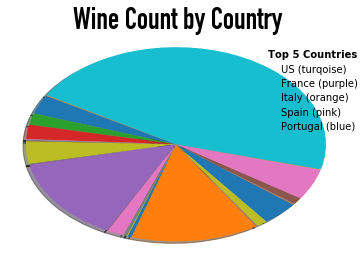

In [33]:
# Select columns
country_data = data[["country", "points"]]

# Group by country count
data_0 = country_data.groupby(["country"]).count()

#rename columns in dataframe, sort by values
data_0.rename(columns={"points": "wine count"}).sort_values(["wine count"], ascending=False)

# Generate a list of countries with the most winse
country_list = data_0.index.tolist()

# Create Pie Chart
plt.pie(data_0, shadow=True, startangle=150, frame=False)

# Append top 5 countries by wine count
plt.figtext(.72, 0.8, 'Top 5 Countries', fontweight = 'bold')
plt.figtext(.75, 0.75, 'US (turqoise)')
plt.figtext(.75, 0.7, 'France (purple)')
plt.figtext(.75, 0.65, 'Italy (orange)')
plt.figtext(.75, 0.6, 'Spain (pink)')
plt.figtext(.75, 0.55, 'Portugal (blue)')

plt.title("Wine Count by Country", size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.axis("auto")


# Save image and print the final product to the screen
plt.savefig("Wine Count by Country.png")
plt.show()

## H1: Quality of wine depends on the year of it's production. The older the wine, the better it tastes.

### Points vs Year

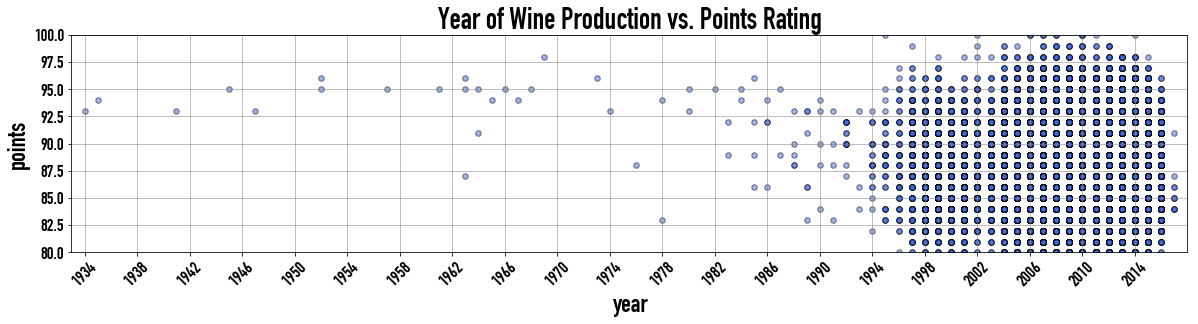

In [34]:
# Set figure size
plt.figure(figsize=(20,4))

#Plot the year vs points data

plt.scatter(data["year"],
            data["points"],
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = data["title"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("Year of Wine Production vs. Points Rating",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.xlabel("year", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("points", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= data["year"].min()-1, right= data["year"].max()+1)
plt.ylim(bottom= data["points"].min(), top= data["points"].max())
plt.xticks(np.arange(data['year'].min(),data['year'].max(), step=4),
           rotation=45, size = 18, fontname = "DIN Condensed")
plt.yticks(size = 18, fontname = "DIN Condensed")

# Save Figure
plt.savefig("Year of Wine Production vs. Points Rating.png")

# Show plot
plt.show()

### Average points by year

In [35]:
# Store the Wine Grouped by Year
grouped_data = data.groupby(["year"])

# Calculate mean points
mean_points = grouped_data[["points"]].mean()

# Append count of wines to the dataframe
mean_points["wine count"] = grouped_data[["title"]].count()

# Convert to DataFrame
mean_points_df = mean_points.reset_index()

# Preview DataFrame
mean_points_df.head()

,year,points,wine count
0,1934,93.0,1
1,1935,94.0,1
2,1941,93.0,1
3,1945,95.0,1
4,1947,93.0,1


In [36]:
# Store the Standard Error associated with Wine Grouped by Year, and country
StdErr_mean_points = grouped_data[["points"]].sem()

# Append count of wines to the dataframe
StdErr_mean_points["wine count"] = grouped_data[["title"]].count()

# Convert to DataFrame
StdErr_mean_points_df = StdErr_mean_points.reset_index()

# Preview DataFrame
StdErr_mean_points_df.head()

,year,points,wine count
0,1934,NaN,1
1,1935,NaN,1
2,1941,NaN,1
3,1945,NaN,1
4,1947,NaN,1


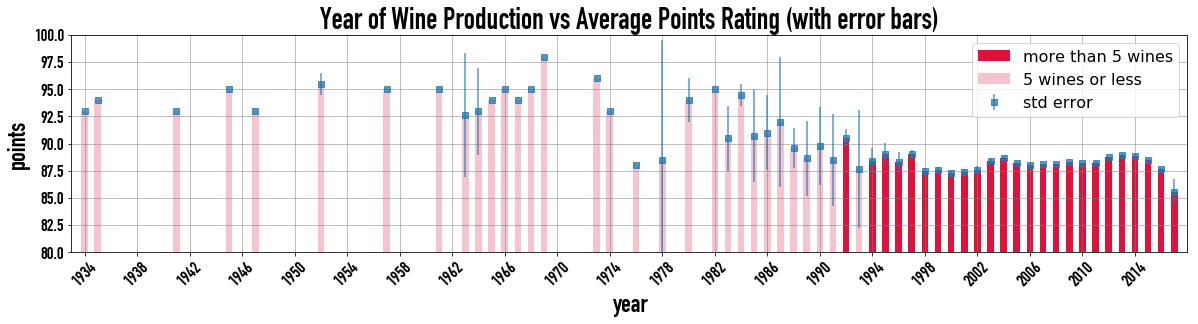

In [37]:
#Split data into years with >5 wines vs multiple
five_or_less = mean_points_df.loc[mean_points_df['wine count'] <= 10, :]
six_or_more = mean_points_df.loc[mean_points_df['wine count'] >= 11, :]

# Set figure size
plt.figure(figsize=(20,4))

# Plot bar graph

six_or_more_results =plt.bar(list(six_or_more["year"].values), 
                              six_or_more["points"],
                              color='crimson',
                              alpha= 1,
                              align="center", 
                              width=.5,
                              label= "more than 5 wines")

five_or_less_results =plt.bar(list(five_or_less["year"].values), 
                              five_or_less["points"],
                              color='crimson',
                              alpha= .25,
                              align="center", 
                              width=.5,
                              label= "5 wines or less")


plt.errorbar(list(mean_points_df["year"].values), 
             mean_points_df["points"], 
             StdErr_mean_points_df["points"]*2,
             fmt="s",
             alpha= .75,
             label = "std error")

plt.legend(loc="best", fontsize=16)

# Format bar graph
plt.title("Year of Wine Production vs Average Points Rating (with error bars)",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("points", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.xlabel("year", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.ylim(80, 100)
plt.xlim(mean_points_df['year'].min()-1, mean_points_df['year'].max()+1)
plt.xticks(np.arange(mean_points_df['year'].min(),mean_points_df['year'].max(), step=4),
           rotation=45, size = 18, fontname = "DIN Condensed")
plt.yticks(size = 18, fontname = "DIN Condensed")


#Save the Figure
plt.savefig("Year vs Average Points.png")

# Show the Figure
plt.show()

## H2: Quality of wine depends on price. The more expensive the wine, the better it tastes.¶

### Wine Points by Price (all)

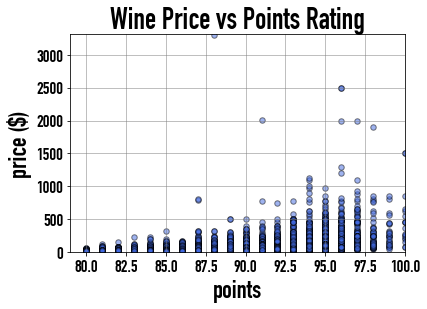

In [38]:
#Plot the price vs points data

plt.scatter(data["points"],
            data["price"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = data["title"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("Wine Price vs Points Rating",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.xlabel("points", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("price ($)", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= data["points"].min()-1, right= data["points"].max())
plt.ylim(bottom= data["price"].min(), top= data["price"].max()+10)
plt.xticks(size = 18, fontname = "DIN Condensed")
plt.yticks(size = 18, fontname = "DIN Condensed")


# Save Figure
plt.savefig("Wine Price vs Points Rating.png")

# Show plot
plt.show()

### Wine Points by Price (all, logscale)

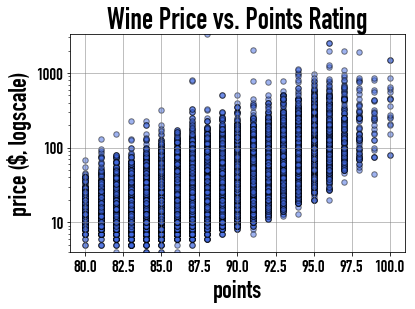

In [39]:
#Plot the price vs points data

fig, ax = plt.subplots()

plt.scatter(data["points"],
            data["price"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = data["title"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("Wine Price vs. Points Rating",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.xlabel("points", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("price ($, logscale)", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= data["points"].min()-1, right= data["points"].max()+1)
plt.ylim(bottom= data["price"].min(), top= data["price"].max())
plt.xticks(size = 18, fontname = "DIN Condensed")
plt.yticks(size = 18, fontname = "DIN Condensed")
plt.yscale('log')

from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())

# Save Figure
plt.savefig("Wine Price vs. Points Rating (log).png")

# Show plot
plt.show()

### Wine Points by Price (under USD100)

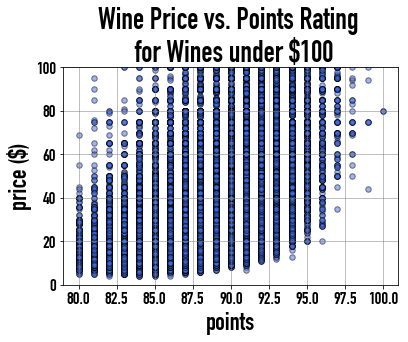

In [40]:
#Plot the price vs points data

plt.scatter(data["points"],
            data["price"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = data["title"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("Wine Price vs. Points Rating \n for Wines under $100",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.xlabel("points", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("price ($)", size = 26, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= data["points"].min()-1, right= data["points"].max()+1)
plt.ylim(bottom= 0, top= 100)
plt.xticks(size = 18, fontname = "DIN Condensed")
plt.yticks(size = 18, fontname = "DIN Condensed")

# Save Figure
plt.savefig("Price vs Points for Wines under USD100.png")

# Show plot
plt.show()

## H3: Quality of wine depends on the region it's from. French wines are the best.¶

In [41]:
# Store the Wine Grouped by Year
grouped_country_data = data.groupby(["country"])

# Calculate mean points
mean_points_by_country = grouped_country_data[["points"]].mean()

# Append count of wines, as well as the points for the higest and lowest rated wines to the dataframe
mean_points_by_country["wine count"] = grouped_country_data[["title"]].count()
mean_points_by_country["max points"] = grouped_country_data[["points"]].max()
mean_points_by_country["min points"] = grouped_country_data[["points"]].min()

# Append std error of points average to the  dataframe
mean_points_by_country["std error points avg"] = grouped_country_data[["points"]].sem()

# Convert to DataFrame
mean_points_by_country_df = mean_points_by_country.reset_index().sort_values(["points"], ascending=False)

# Preview DataFrame
mean_points_by_country_df.head()

,country,points,wine count,max points,min points,std error points avg
13,England,91.709091,55,95,89,0.241589
19,India,90.222222,9,93,87,0.571979
3,Austria,90.210774,2766,97,82,0.046586
16,Germany,89.843631,2104,98,81,0.053868
7,Canada,89.379447,253,94,82,0.150889


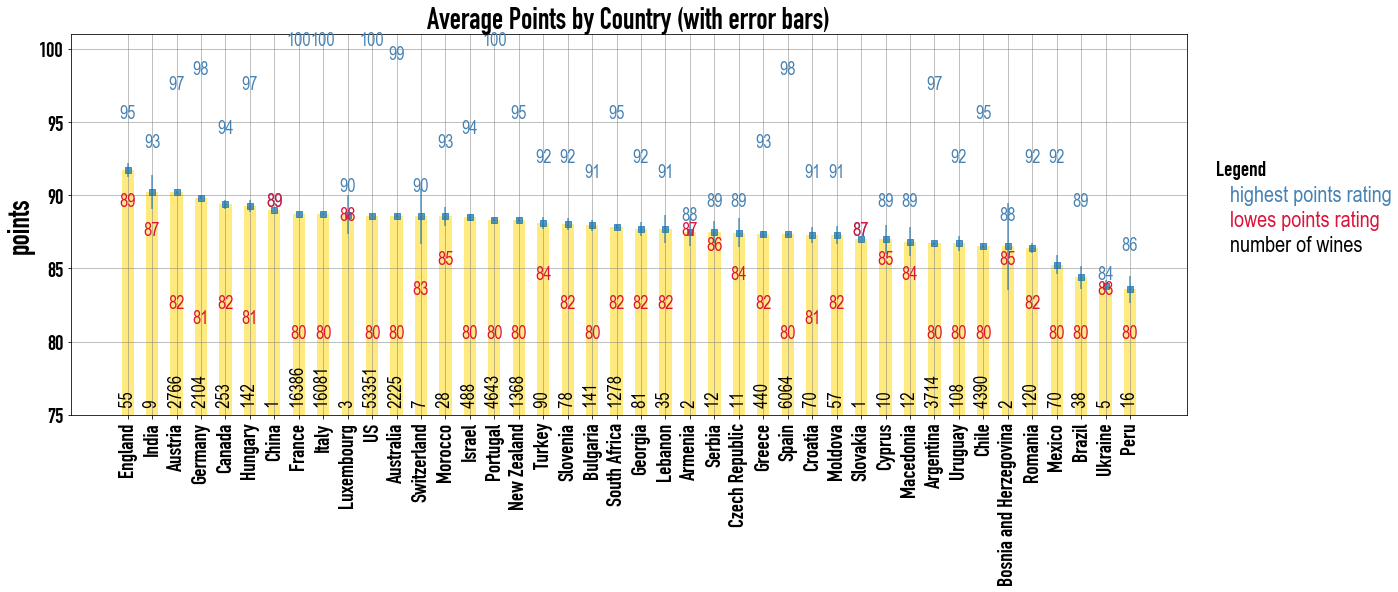

In [42]:
plt.figure(figsize=(20,7))

country_results =plt.bar(list(mean_points_by_country_df['country'].values), 
                         mean_points_by_country_df['points'],
                         color='gold',
                         alpha= .5,
                         align="center", 
                         width=.5,
                         label= mean_points_by_country_df['points']
                        )

plt.errorbar(list(mean_points_by_country_df['country'].values), 
             mean_points_by_country_df['points'], 
             mean_points_by_country_df['std error points avg']*2,
             fmt="s",
             alpha= .75)

# Use functions to label the bar graph
wine_count = mean_points_by_country_df['wine count'].tolist()
max_list = mean_points_by_country_df['max points'].tolist()
min_list = mean_points_by_country_df['min points'].tolist()

def label(bars):
    
    for bar in bars:
        i = int(bar.get_x()+.25)
        wc = wine_count[i]
        ma = max_list[i]
        mi = min_list[i]
        height = bar.get_height()
        
        plt.text(bar.get_x() + bar.get_width()/2.,ma,
                f"{ma}",
                ha='center', va='bottom', color='steelblue', size = 18, fontname='Arial Narrow')
        
        plt.text(bar.get_x() + bar.get_width()/2.,mi,
                f"{mi}",
                ha='center', va='bottom', color='crimson', size = 18, fontname='Arial Narrow')
        
        plt.text(bar.get_x() + bar.get_width()/2.,75,
                f"  {wc}",
                ha='center', va='bottom', color='black', rotation='vertical', size = 18, fontname='Arial Narrow')
            
# Call function
label(country_results)

# Format bar graph
plt.title("Average Points by Country (with error bars)",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("points", size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.ylim(75, 101)
plt.xticks(rotation='vertical', size = 22, fontname = "DIN Condensed")
plt.yticks(size = 22, fontname = "DIN Condensed")

# Incorporate a text Leged
plt.figtext(.92, 0.6, 'Legend', fontweight='bold', size=22, fontname = "DIN Condensed")
plt.figtext(.93, 0.55, 'highest points rating', color = 'steelblue', size=22, fontname='Arial Narrow')
plt.figtext(.93, 0.5, 'lowes points rating', color = 'crimson', size=22, fontname='Arial Narrow')
plt.figtext(.93, 0.45, 'number of wines', color = 'black', size=22, fontname='Arial Narrow')


#Save the Figure
plt.savefig("Average Points by Country (with error bars).png")

# Show the Figure
plt.show()

### 99 and 100 point wines by price

In [43]:
best_rated_wines = data.loc[(data["points"] >= 99),:]

organized_best_rated_wines = best_rated_wines[["points","title","variety", "country", "province","price"]]

best_sorted_wines=organized_best_rated_wines.sort_values(["price"], ascending =True).head(8)

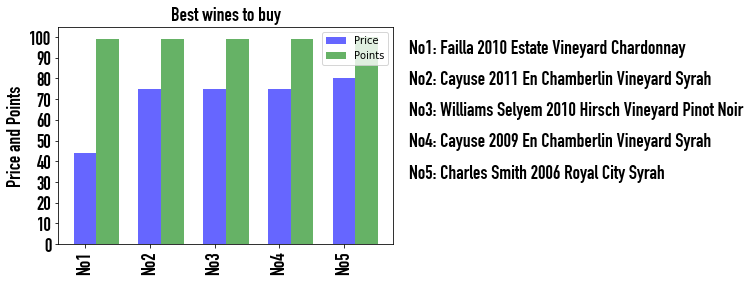

In [44]:
# data to plot

width =0.5
n_groups = 5

price = best_sorted_wines["price"].head()
points = best_sorted_wines["points"].head()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

price = ax.bar(index, price, bar_width,
                alpha=opacity, color='b',
                label='Price')

points = ax.bar(index + bar_width, points, bar_width,
                alpha=opacity, color='g',
                label='Points')

plt.text(5,90,'No1: Failla 2010 Estate Vineyard Chardonnay', ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,75,'No2: Cayuse 2011 En Chamberlin Vineyard Syrah',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,60,'No3: Williams Selyem 2010 Hirsch Vineyard Pinot Noir',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,45,'No4: Cayuse 2009 En Chamberlin Vineyard Syrah',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,30,'No5: Charles Smith 2006 Royal City Syrah ',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
    
plt.ylabel('Price and Points', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.title('Best wines to buy', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.yticks(np.arange(0, 110, 10), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.xticks(index, ('No1', 'No2', 'No3', 'No4', 'No5'), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.legend((price[0], points[0]), ('Price', 'Points'), loc = "upper right")
plt.xticks(rotation="vertical")

plt.savefig("Wines with highest points.png")
plt.show()


### What country provides the best value wines?

In [45]:
# Append average price per point as well as max and min average prices per point dataframe
mean_points_by_country["average price per point"] = grouped_country_data[["price per point"]].mean()
mean_points_by_country["max price per point"] = grouped_country_data[["price per point"]].max()
mean_points_by_country["min price per point"] = grouped_country_data[["price per point"]].min()

# Append std error of points average to the  dataframe
mean_points_by_country["std error average price per point"] = grouped_country_data[["price per point"]].sem()

# Convert to DataFrame
mean_points_by_country_df2 = mean_points_by_country.reset_index().sort_values(["average price per point"], ascending=True)

# Preview DataFrame
mean_points_by_country_df2.head()

,country,points,wine count,max points,min points,std error points avg,average price per point,max price per point,min price per point,std error average price per point
40,Ukraine,83.800000,5,84,83,0.200000,0.105135,0.156627,0.071429,0.020643
4,Bosnia and Herzegovina,86.500000,2,88,85,1.500000,0.144652,0.152941,0.136364,0.008289
19,India,90.222222,9,93,87,0.571979,0.147356,0.215054,0.111111,0.012584
1,Armenia,87.500000,2,88,87,0.500000,0.165687,0.170455,0.160920,0.004768
6,Bulgaria,87.936170,141,91,80,0.174984,0.165714,1.111111,0.091954,0.008827


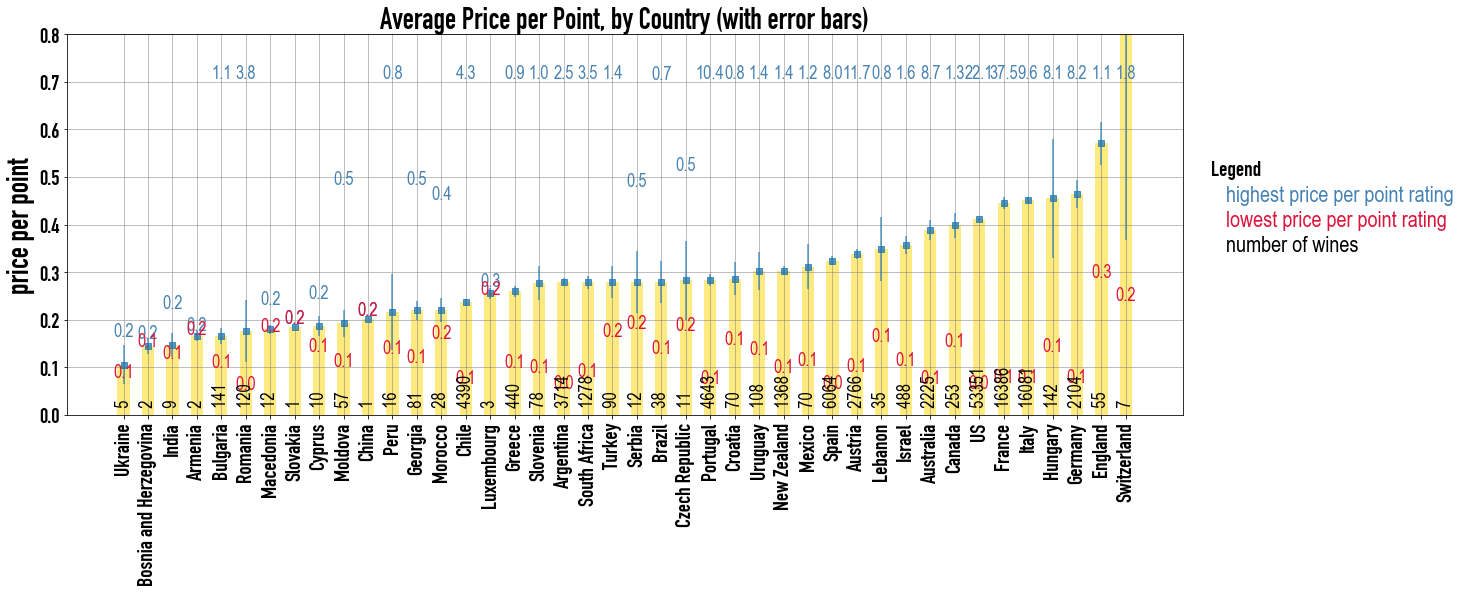

In [46]:
plt.figure(figsize=(20,7))

country_results =plt.bar(list(mean_points_by_country_df2['country'].values), 
                         mean_points_by_country_df2['average price per point'],
                         color='gold',
                         alpha= .5,
                         align="center", 
                         width=.5,
                         label= mean_points_by_country_df2['average price per point']
                        )

plt.errorbar(list(mean_points_by_country_df2['country'].values), 
             mean_points_by_country_df2['average price per point'], 
             mean_points_by_country_df2['std error average price per point']*2,
             fmt="s",
             alpha= .75)

# Use functions to label the bar graph
wine_count_2    = mean_points_by_country_df2['wine count'].tolist()
max_ppp_list    = mean_points_by_country_df2['max price per point'].tolist()
min_ppp_list    = mean_points_by_country_df2['min price per point'].tolist()
avg_points_list = mean_points_by_country_df2['points'].tolist()

def label(bars):
    
    for bar in bars:
        i = int(bar.get_x()+.25)
        wc2 = wine_count_2[i]
        ma_ppp = max_ppp_list[i]
        mi_ppp = min_ppp_list[i]
        avg_p = avg_points_list[i]
        height = bar.get_height()
        
#         plt.text(bar.get_x() + bar.get_width()/2.,height,
#                 f"{int(height)}",
#                 ha='center', va='bottom', color='red')
        
#         plt.text(bar.get_x() + bar.get_width()/2.,.15,
#                 f"{round(avg_p,1)}",
#                 ha='center', va='bottom', color='red', rotation='vertical')
        
        plt.text(bar.get_x() + bar.get_width()/2.,
                 min(ma_ppp, .7),
                 f"{round(ma_ppp,1)}",
                 ha='center', va='bottom', color='steelblue', size = 18, fontname='Arial Narrow')
        
        plt.text(bar.get_x() + bar.get_width()/2., mi_ppp,
                f"{round(mi_ppp,1)}",
                ha='center', va='bottom', color='crimson', size = 18, fontname='Arial Narrow')
        
        plt.text(bar.get_x() + bar.get_width()/2.,0,
                f"  {wc2}",
                ha='center', va='bottom', color='black', rotation='vertical', size = 18, fontname='Arial Narrow')
            
# Call function
label(country_results)

# Format bar graph
plt.title("Average Price per Point, by Country (with error bars)",
          size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.ylabel("price per point", size = 30, fontweight="bold", fontname = "DIN Condensed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.ylim(0, 0.8)
plt.xticks(rotation='vertical', size = 22, fontname = "DIN Condensed")
plt.yticks(size = 22, fontname = "DIN Condensed")


# Incorporate a text Leged
plt.figtext(.92, 0.6, 'Legend', fontweight='bold', size=22, fontname = "DIN Condensed")
plt.figtext(.93, 0.55, 'highest price per point rating', color = 'steelblue', size=22, fontname='Arial Narrow')
plt.figtext(.93, 0.5, 'lowest price per point rating', color = 'crimson', size=22, fontname='Arial Narrow')
plt.figtext(.93, 0.45, 'number of wines', color = 'black', size=22, fontname='Arial Narrow')


#Save the Figure
plt.savefig("Average Price per Point, by Country (with error bars).png")

# Show the Figure
plt.show()

### What are the best value wines?

In [47]:
best_value_wines = data.loc[(data["price per point"] <= 0.2),:]
best_value_wines_90 = best_value_wines.loc[(data["points"] >= 90),:]

organized_best_value_wines_90 = best_value_wines_90[["price per point", "points","title","variety", "country", "province","price"]]

best_value = organized_best_value_wines_90.sort_values(["price per point"], ascending =True).head(17)

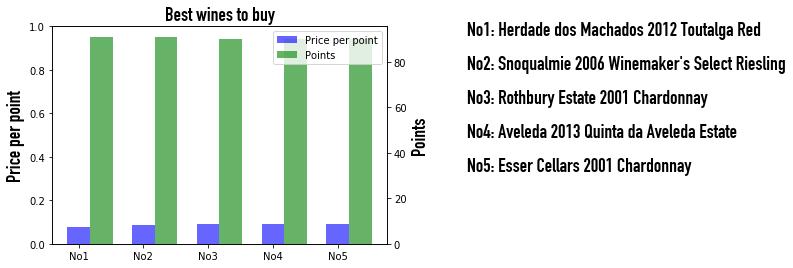

In [48]:

width =0.5
n_groups = 5

price_per_point = best_value["price per point"].head()
points = best_value["points"].head()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

# instantiate a second axes that shares the same x-axis

ax1 = ax.twinx()

# ax.tick_params(axis='y')

rects1 = ax.bar(index, price_per_point, bar_width,
                alpha=opacity, color='b',
                label='Price per point')

rects2 = ax1.bar(index + bar_width, points, bar_width,
                alpha=opacity, color='g',
                label='Points')

plt.text(6,90,'No1: Herdade dos Machados 2012 Toutalga Red', ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(6,75,"No2: Snoqualmie 2006 Winemaker's Select Riesling",ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(6,60,'No3: Rothbury Estate 2001 Chardonnay',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(6,45,'No4: Aveleda 2013 Quinta da Aveleda Estate',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(6,30,'No5: Esser Cellars 2001 Chardonnay',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
    
plt.ylabel("Points", size = 20, fontweight="bold", fontname = "DIN Condensed")
ax.set_ylabel('Price per point', size = 20, fontweight="bold", fontname = "DIN Condensed")
ax.set_ylim(0,1,0.01)
plt.title('Best wines to buy', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.xticks(index, ('No1', 'No2', 'No3', 'No4', 'No5'))
plt.legend((rects1[0], rects2[0]), ('Price per point', 'Points'), loc = "upper right")
plt.xticks(rotation="vertical")



plt.savefig("Best value wines.png")
plt.show()


### What are the best wines under USD 30?

In [49]:
top_rated_wines = data.loc[(data["points"] >= 96),:]
wines_to_buy = top_rated_wines.loc[(data["price"] <= 30),:]

organized_wines_to_buy = wines_to_buy[["points","title","variety", "country", "province","price"]]

organized_wines_to_buy.sort_values(["points" , "price"], ascending= [False, True])

,points,title,variety,country,province,price
91161,96,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah & Shiraz,US,Washington,20.0
36095,96,Isole e Olena 2010 Chianti Classico,Red Blend,Italy,Tuscany,27.0
48663,96,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,US,California,27.0
92003,96,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,US,Oregon,27.0
41152,96,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,France,Bordeaux,28.0
48715,96,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Austria,Kamptal,28.0
8906,96,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,France,Alsace,29.0
73490,96,Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,US,Washington,30.0
98587,96,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,US,Oregon,30.0


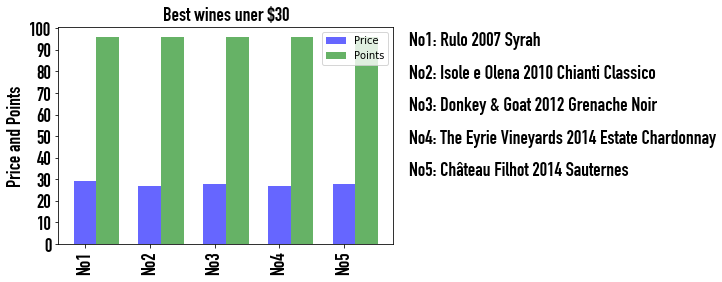

In [50]:
# data to plot


width =0.5
n_groups = 5

price = organized_wines_to_buy["price"].head()
points = organized_wines_to_buy["points"].head()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, price, bar_width,
                alpha=opacity, color='b',
                label='Price')

rects2 = ax.bar(index + bar_width, points, bar_width,
                alpha=opacity, color='g',
                label='Points')

plt.text(5,90,'No1: Rulo 2007 Syrah', ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,75,'No2: Isole e Olena 2010 Chianti Classico',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,60,'No3: Donkey & Goat 2012 Grenache Noir',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,45,'No4: The Eyrie Vineyards 2014 Estate Chardonnay',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,30,'No5: Château Filhot 2014 Sauternes',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
    
plt.ylabel('Price and Points', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.title('Best wines uner $30', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.yticks(np.arange(0, 110, 10), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.xticks(index, ('No1', 'No2', 'No3', 'No4', 'No5'), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.legend((rects1[0], rects2[0]), ('Price', 'Points'), loc = "upper right")
plt.xticks(rotation="vertical")


plt.savefig("Best wines for under 30 $.png")
plt.show()


### What are the best wines under USD100?

In [51]:
top_rated_wines = data.loc[(data["points"] >= 98),:]
wines_to_buy = top_rated_wines.loc[(data["price"] <= 100),:]

organized_wines_to_buy = wines_to_buy[["points","title","variety", "country", "province","price"]]

organized_wines_to_buy.sort_values(["points", "price"], ascending = [False, True])

,points,title,variety,country,province,price
102224,100,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah & Shiraz,US,Washington,80.0
110940,100,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah & Shiraz,US,Washington,80.0
105964,99,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,US,California,44.0
42462,99,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah & Shiraz,US,Oregon,75.0
42463,99,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,US,California,75.0
42884,99,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah & Shiraz,US,Oregon,75.0
1417,99,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,US,California,94.0
115245,99,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,US,California,100.0
1420,98,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,US,Washington,50.0
105127,98,Gramercy 2010 Lagniappe Syrah (Columbia Valley...,Syrah & Shiraz,US,Washington,55.0


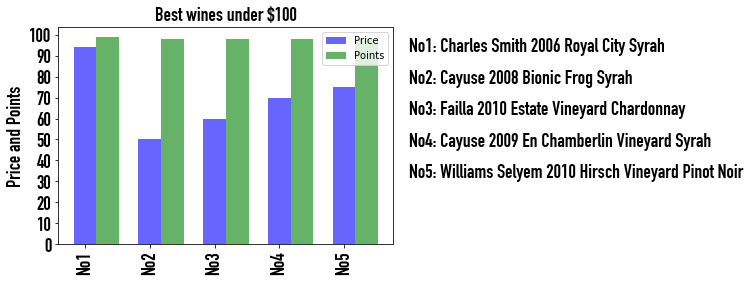

In [52]:
width =0.5
n_groups = 5

price = organized_wines_to_buy["price"].head()
points = organized_wines_to_buy["points"].head()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, price, bar_width,
                alpha=opacity, color='b',
                label='Price')

rects2 = ax.bar(index + bar_width, points, bar_width,
                alpha=opacity, color='g',
                label='Points')

plt.text(5,90,'No1: Charles Smith 2006 Royal City Syrah', ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,75,'No2: Cayuse 2008 Bionic Frog Syrah',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,60,'No3: Failla 2010 Estate Vineyard Chardonnay',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,45,'No4: Cayuse 2009 En Chamberlin Vineyard Syrah',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.text(5,30,'No5: Williams Selyem 2010 Hirsch Vineyard Pinot Noir',ha='left', va='bottom', color='black', size = 20, fontweight="bold", fontname = "DIN Condensed")
    
plt.ylabel('Price and Points', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.title('Best wines under $100', size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.yticks(np.arange(0, 110, 10), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.xticks(index, ('No1', 'No2', 'No3', 'No4', 'No5'), size = 20, fontweight="bold", fontname = "DIN Condensed")
plt.legend((rects1[0], rects2[0]), ('Price', 'Points'), loc = "upper right")
plt.xticks(rotation="vertical")


plt.savefig("Best wines for under 100 $.png")
plt.show()

# Other

# Weather influence on wine quality

* Unfortunately historic weather data is available only for prime users, so we decided not to continue with research on hypothesys, that quality of wine depends on temperatures and humidity during the year.

In [85]:
# Store the Wine Grouped by Province
grouped_province_data = data.groupby(["province"])

# Calculate mean points
mean_points_by_province = grouped_province_data[["points"]].mean()

# Append count of wines, as well as the points for the higest and lowest rated wines to the dataframe
mean_points_by_province["wine count"] = grouped_province_data[["title"]].count()
mean_points_by_province["max points"] = grouped_province_data[["points"]].max()
mean_points_by_province["min points"] = grouped_province_data[["points"]].min()

# Append std error of points average to the  dataframe
mean_points_by_province["std error points avg"] = grouped_province_data[["points"]].sem()
mean_points_by_province = mean_points_by_province.loc[(mean_points_by_province["wine count"] >= 100),:]
best_rated_wines = data.loc[(data["points"] >= 99),:]

# Convert to DataFrame
mean_points_by_province_df = mean_points_by_province.reset_index().sort_values(["points"], ascending=False)

# Preview DataFrame
mean_points_by_province_df.head()

,province,points,wine count,max points,min points,std error points avg
19,Champagne,92.310870,460,100,83,0.110339
75,Wachau,91.665584,308,96,85,0.146759
56,Port,91.440945,254,100,84,0.180885
31,Kamptal,91.396450,338,96,85,0.117734
59,Rheingau,90.993506,308,98,85,0.137972


In [179]:
weather_data = []

province = ["Champagne", "Wachau", "Port", "Kamptal", "Rheingau", "Rapel Valley", "Maule Valley", "Michigan", "Limarí Valley", "Casablanca Valley"]
cities = ["Reims", "Melk", "Porto", "Langenlois", "Wiesbaden", "Rapel", "Melk", "Muskegon", "Ovalle", "Quilpue"]


url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    
    query_url = f"{url}q={city}&appid={api_key}"
    weather_response = requests.get(query_url).json()

    try:
        city_data = [weather_response["name"], 
                     weather_response["sys"]["country"],
                     weather_response["main"]["temp"],
                     weather_response["main"]["humidity"]]
                    
        weather_data.append(city_data)
        
        print(f"Processing Record {cities.index(city)} | {weather_response['name']}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")

NameError: name 'api_key' is not defined

In [180]:
weather = pd.DataFrame.from_records(weather_data, columns=["city", "country", "temperature", "humidity"])
av_points = [92, 91, 91, 91, 90, 85, 85, 86, 86, 86]
weather["av points"] = av_points

weather

,city,country,temperature,humidity,av points
0,NaN,NaN,NaN,NaN,92
1,NaN,NaN,NaN,NaN,91
2,NaN,NaN,NaN,NaN,91
3,NaN,NaN,NaN,NaN,91
4,NaN,NaN,NaN,NaN,90
5,NaN,NaN,NaN,NaN,85
6,NaN,NaN,NaN,NaN,85
7,NaN,NaN,NaN,NaN,86
8,NaN,NaN,NaN,NaN,86
9,NaN,NaN,NaN,NaN,86


ValueError: Axis limits cannot be NaN or Inf

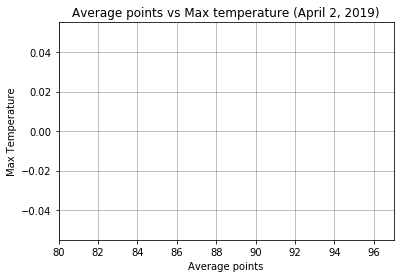

In [181]:
# Build the scatter plot

plt.scatter(weather["av points"],
            weather["temperature"],  
            facecolors="steelblue", edgecolors="black", alpha=0.7,
            label = weather["city"],
            marker= "o", linewidth=1, s= 30)

plt.title("Average points vs Max temperature (April 2, 2019)")
plt.xlabel("Average points")
plt.ylabel("Max Temperature")

plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= weather["av points"].min()-5, right= weather["av points"].max()+5)
plt.ylim(bottom= weather["temperature"].min()-5, top= weather["temperature"].max()+5)

plt.savefig("Average points vs Max temperature (April 2, 2019).png")

# Show plot
plt.show()

ValueError: Axis limits cannot be NaN or Inf

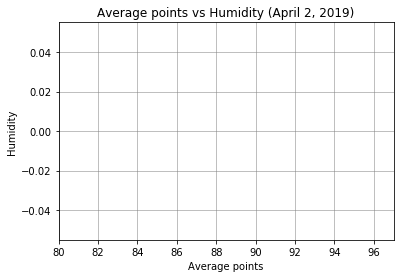

In [182]:
# Build the scatter plot

plt.scatter(weather["av points"],
            weather["humidity"],  
            facecolors="steelblue", edgecolors="black", alpha=0.7,
            label = weather["city"],
            marker= "o", linewidth=1, s= 30)

plt.title("Average points vs Humidity (April 2, 2019)")
plt.xlabel("Average points")
plt.ylabel("Humidity")

plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= weather["av points"].min()-5, right= weather["av points"].max()+5)
plt.ylim(bottom= weather["humidity"].min()-5, top= weather["humidity"].max()+5)

plt.savefig("Average points vs Humidity (April 2, 2019).png")

# Show plot
plt.show()